# Binarización

Umbral Fijo, Otsu, Bernsen

In [1]:
# %matplotlib
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('mib-alien.jpg', cv.IMREAD_GRAYSCALE)

#### Binarización por umbral fijo

In [3]:
# Funcion de binarización (a mano)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

#### Comparación entre tipos de binarización (Fijo, Otsu, Mediana)

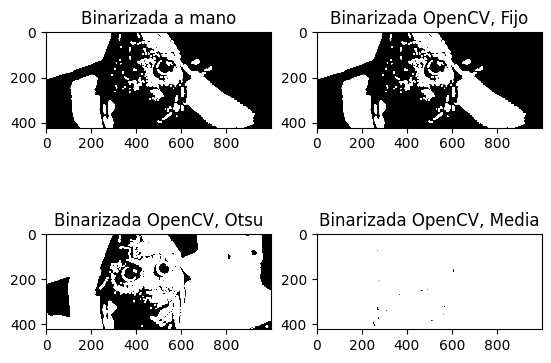

In [4]:
# Nueva figura
fig = plt.figure()

# Imagen binarizada (a mano - Fijo)
ax2=plt.subplot(221)
img_bin = global_threshold(img, 120, 255, 0)
ax2.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax2.set_title('Binarizada a mano')

# Imagen binarizada (embebida - Fijo) - Parámetros: Imag_original,umbral,valor_máximo,método
ax3=plt.subplot(222)
ret, thresh = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
ax3.imshow(thresh, cmap='gray', vmin=0, vmax=1)
ax3.set_title('Binarizada OpenCV, Fijo')

# Imagen binarizada (embebida - Otsu) - Parámetros: Imag_original,umbral,valor_máximo,método
ax4=plt.subplot(223)
ret, thresh = cv.threshold(img, 120, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ax4.imshow(thresh,cmap='gray', vmin=0, vmax=1)
ax4.set_title('Binarizada OpenCV, Otsu')

# Imagen binarizada (embebida - Media) - Parámetros: Imag_original,valor_máximo,método adaptativo,tipo de umbral,tamaño de bloque,C
ax4=plt.subplot(224)
thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
ax4.imshow(thresh,cmap='gray', vmin=0, vmax=1)
ax4.set_title('Binarizada OpenCV, Media')

plt.show()